In [1]:
NUM_CIRCUITS = 70
NUM_SHOTS = 8192

In [2]:
from qiskit import *
from qiskit.providers.fake_provider import FakeQuito

sim = FakeQuito()


qc_multiple = [QuantumCircuit(5, 5) for _ in range(NUM_CIRCUITS)]

for (idx, qc) in enumerate(qc_multiple):
    qc.x(1)
    # qc.u(51.95, -83.84, 244.53, 1)
    for _ in range(280 * (idx + 1)):
        qc.id(1)
        qc.id(1)
    qc.x(1)
    # qc.u(-51.95, 83.84, -244.53, 1)

    qc.barrier()
    for i in range(5):
        qc.measure(i, i)
    # qc.draw()


In [3]:
qc_multiple[0].draw()

»
q_0: ──────────────────────────────────────────────────────────────────────»
     ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
q_1: ┤ X ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
q_2: ──────────────────────────────────────────────────────────────────────»
                                                                           »
q_3: ──────────────────────────────────────────────────────────────────────»
                                                                           »
q_4: ──────────────────────────────────────────────────────────────────────»
                                                                           »
c: 5/══════════════════════════════════════════════════════════════════════»
                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«     ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
«q_1: ┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├»
«     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_4: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«c: 5/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«     ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
«q_1: ┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├»
«     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_4: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«c: 5/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«     ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
«q_1: ┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├»
«     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_4: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«c: 5/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                               

In [4]:
result_submissions = execute(qc_multiple, sim, shots=NUM_SHOTS).result().to_dict()

In [5]:
fidilities = []
for i in range(NUM_CIRCUITS):
    result = result_submissions['results'][i]
    zero_count = result['data']['counts']['0x0']
    fidilities.append(zero_count/NUM_SHOTS)
    # print(f"Zero count: {zero_count}, prob : {zero_count/8192}")

Text(0, 0.5, 'Fidilities')

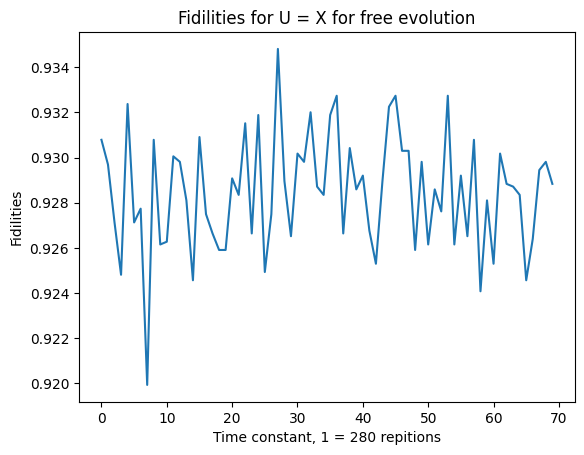

In [11]:
import matplotlib.pyplot as plt

plt.plot(fidilities)
plt.title("Fidilities for U = X for free evolution")
plt.xlabel("Time constant, 1 = 280 repitions")
plt.ylabel("Fidilities")